   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Ac

C:\Users\Benchmatrix WLL\AppData\Local\Temp\ipykernel_19444\2950685550.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\Benchmatrix WLL\AppData\Local\Temp\ipykernel_19444\2950685550.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

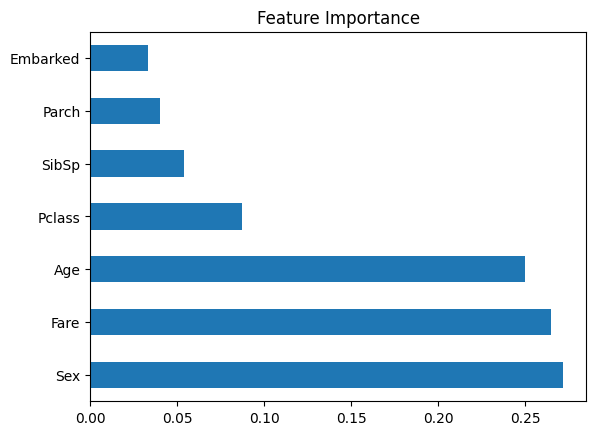

In [6]:
# Titanic Survival Prediction Notebook

# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# 2. Load Dataset
df = pd.read_csv("C:\\Users\\Benchmatrix WLL\\Downloads\\Nouveau dossier\\Titanic-Dataset.csv")
print(df.head())

# 3. Data Preprocessing
# Drop columns not useful for prediction
df = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

# Fill missing Age with median
df["Age"].fillna(df["Age"].median(), inplace=True)

# Fill missing Embarked with mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Encode categorical variables
le_sex = LabelEncoder()
df["Sex"] = le_sex.fit_transform(df["Sex"])  # male=1, female=0

le_embarked = LabelEncoder()
df["Embarked"] = le_embarked.fit_transform(df["Embarked"])

# 4. Features and Target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# 5. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train Model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 7. Predictions
y_pred = model.predict(X_test)

# 8. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 9. Feature Importance (optional)
import matplotlib.pyplot as plt

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importance")
plt.show()


C:\Users\Benchmatrix WLL\AppData\Local\Temp\ipykernel_7456\1821590252.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Benchmatrix WLL\AppData\Local\Temp\ipykernel_7456\1821590252.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

Meilleurs paramètres trouvés : {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Accuracy : 0.8100558659217877

Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Confusion Matrix :
 [[92 13]
 [21 53]]


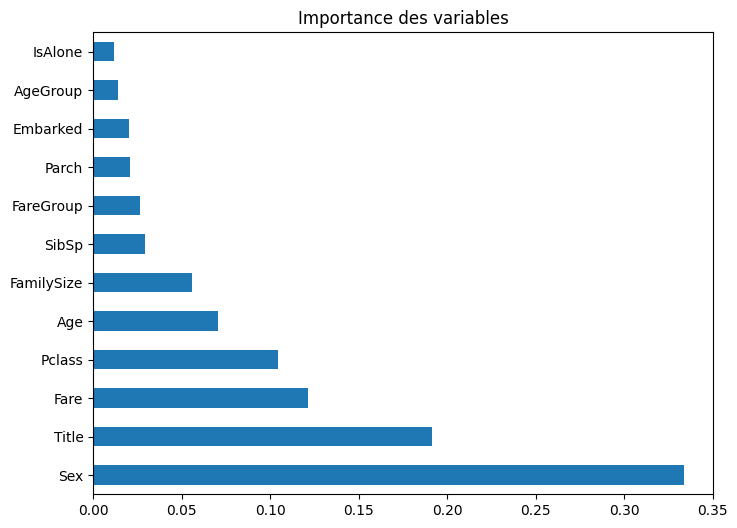

In [3]:
# Titanic Survival Prediction - Version Améliorée

# 1. Importer les librairies
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# 2. Charger le dataset
df = pd.read_csv("C:\\Users\\Benchmatrix WLL\\Downloads\\Nouveau dossier\\Titanic-Dataset.csv")

# 3. Feature Engineering
# Extraire le titre depuis le nom (Mr, Mrs, Miss, etc.)
df['Title'] = df['Name'].apply(lambda x: re.search(' ([A-Za-z]+)\.', x).group(1))

# Regrouper les titres rares
df['Title'] = df['Title'].replace(['Mlle','Ms'], 'Miss')
df['Title'] = df['Title'].replace(['Mme'], 'Mrs')
df['Title'] = df['Title'].replace(['Dr','Col','Major','Rev','Jonkheer','Capt','Don','Sir','Countess','Lady'], 'Rare')

# Créer une variable "FamilySize"
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Variable "IsAlone"
df['IsAlone'] = 1
df.loc[df['FamilySize'] > 1, 'IsAlone'] = 0

# Catégoriser Age
df['Age'].fillna(df['Age'].median(), inplace=True)
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child','Teen','YoungAdult','Adult','Senior'])

# Catégoriser Fare
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['FareGroup'] = pd.qcut(df['Fare'], 4, labels=['Low','Medium','High','VeryHigh'])

# Remplir Embarked manquant par la valeur la plus fréquente
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# 4. Encoder les variables catégorielles
for col in ['Sex','Embarked','Title','AgeGroup','FareGroup']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# 5. Supprimer les colonnes inutiles
df = df.drop(["PassengerId","Name","Ticket","Cabin"], axis=1)

# 6. Séparer Features et Target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# 7. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Optimisation Random Forest avec GridSearchCV
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(RandomForestClassifier(random_state=42),
                    param_grid,
                    cv=5,
                    scoring='accuracy',
                    n_jobs=-1)

grid.fit(X_train, y_train)

# 9. Meilleurs paramètres
print("Meilleurs paramètres trouvés :", grid.best_params_)

# 10. Évaluer le meilleur modèle
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nClassification Report :\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix :\n", confusion_matrix(y_test, y_pred))

# 11. Importance des variables
feat_importances = pd.Series(best_model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh', figsize=(8,6))
plt.title("Importance des variables")
plt.show()


Coefficients : [-5.51112489  2.15877941 -1.69993097 -1.44203743 -0.01097225]
Intercept : 42.474495709775965
R² score : 0.18431018802343901
RMSE : 11.783803833626589


C:\Users\Benchmatrix WLL\AppData\Local\Temp\ipykernel_19444\3528173886.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\Benchmatrix WLL\AppData\Local\Temp\ipykernel_19444\3528173886.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

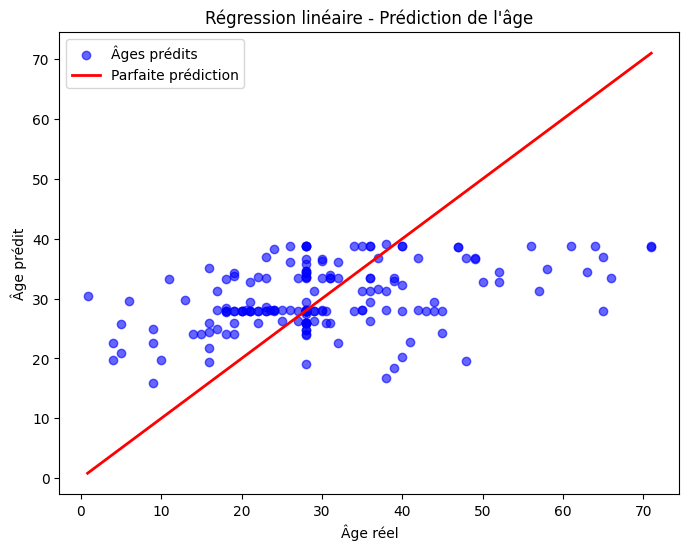

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Charger dataset
df = pd.read_csv("C:\\Users\\Benchmatrix WLL\\Downloads\\Nouveau dossier\\Titanic-Dataset.csv")

# Prétraitement rapide
df = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Encodage
df["Sex"] = df["Sex"].map({"male": 1, "female": 0})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# Features et target
X = df[["Pclass", "Sex", "SibSp", "Parch", "Fare"]]  # features
y = df["Age"]  # target = âge

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation
print("Coefficients :", model.coef_)
print("Intercept :", model.intercept_)
print("R² score :", r2_score(y_test, y_pred))
import numpy as np

print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))


# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6, label="Âges prédits")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color="red", linewidth=2, label="Parfaite prédiction")

plt.xlabel("Âge réel")
plt.ylabel("Âge prédit")
plt.title("Régression linéaire - Prédiction de l'âge")
plt.legend()
plt.show()

